In [1]:
import pandas as pd
import spacy
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

In [2]:
# Count the number of third person pronouns 
# as an indicator of narrativity
def cnt_third_pron_normed(text):
    third_pron = ['he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', \
                  'itself', 'they', 'their', 'theirs', 'themselves']
    text = text.replace('\n', '').replace('.', ' ').lower().split(' ')
    sum = 0
    for p in third_pron:
        sum += text.count(p)
    return sum/len(text)

In [3]:
# Read Christine's lexicon
verbs_df = pd.read_csv('../data/verb_narrativity.csv', sep = ',')
verbs_df = verbs_df[verbs_df['Narrativity'] == 'narrative']
verbs_df = verbs_df[['Considered_verb', 'Narrativity']]
narrative_verb = verbs_df.drop_duplicates()['Considered_verb'].tolist()
narrative_verb.remove('were')

In [4]:
# Count the narrative verbs from the lexicon
# in a text
def cnt_narrative_verb_normed(text):
    text = text.replace('\n', '').replace('.', ' ').lower()
    sum = 0
    for p in narrative_verb:
        sum += len(re.findall(p, text))
    return sum/len(text)

In [5]:
def compute_narrativity_score(text):
    return cnt_third_pron_normed(text) + cnt_narrative_verb_normed(text)

In [6]:
# Count the morality words from the lexicon
# in a text
def compute_morality(text):
    text = text.replace('\n', '').replace('.', ' ').lower()
    sum = 0
    for p in morality_words:
        sum += text.count(p)
    return sum/len(text)

In [7]:
morality_df = pd.read_csv('../data/MFTdict_POS_matchedfromGLOVEset.txt', sep = ' ')
morality_words = morality_df['MFTword'].tolist()

### Sanity check w gold standard

In [173]:
low_nar_path = '../data/low_narrativity_gs/'

In [174]:
high_nar_path = '../data/high_narrativity_gs/'

In [187]:
results_high = []
for file in os.listdir(high_nar_path):
    with open(high_nar_path + file, 'r') as f:
        text = f.read()
    results_high.append(cnt_third_pron_normed(text) + (cnt_narrative_verb_normed(text)))

In [188]:
results_low = []
for file in os.listdir(low_nar_path):
    with open(low_nar_path + file, 'r') as f:
        text = f.read()
    results_low.append(cnt_third_pron_normed(text) + (cnt_narrative_verb_normed(text)))

In [189]:
results_high, results_low

([0.03769265805674322,
  0.021936347962498427,
  0.05415161482300612,
  0.06543446726872866,
  0.020547129019627873,
  0.061728533178200914,
  0.03608826228577123,
  0.022213926810769814,
  0.0106168786218627],
 [0.004796163069544364,
  0.022719582882658015,
  0.012886142824194199,
  0.02030456852791878,
  0.030201263187784176,
  0.002369668246445498,
  0.044997543514879286,
  0.0,
  0.007330654608756583,
  0.020590314598798162])

In [190]:
stats.ttest_ind(results_high,results_low)

Ttest_indResult(statistic=2.575066086744477, pvalue=0.019667391223248096)

In [ ]:
error_high = np.

In [179]:
y = [results_high/10,results_low/10]
x = [0, 1]

In [180]:
low_moral_path = '../data/low_morality_gs/'

In [181]:
high_moral_path = '../data/high_morality_gs/'

In [191]:
moral_results_high = 0
for file in os.listdir(high_moral_path):
    with open(high_moral_path + file, 'r') as f:
        text = f.read()
    moral_results_high += compute_morality(high_moral_path + text)

In [192]:
moral_results_low = 0
for file in os.listdir(low_moral_path):
    with open(low_moral_path + file, 'r') as f:
        text = f.read()
    moral_results_low += compute_morality(low_moral_path + text)

In [184]:
moral_results_high, moral_results_low

(0.09468749568913706, 0.05607686397348924)

In [185]:
y2 = [moral_results_high/10,moral_results_low/10]

In [ ]:
lower_error = [dic[j][0]-dic[j][1] for j in x]
upper_error = [dic[j][2]-dic[j][0] for j in x]
asymmetric_error = [lower_error, upper_error]


plt.errorbar(x, y, yerr=asymmetric_error,fmt='o')

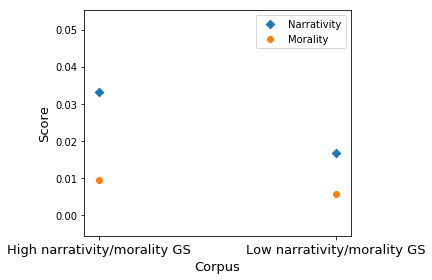

In [186]:
plt.scatter(x, y, marker='D',label = 'Narrativity')
plt.scatter(x, y2, label = 'Morality')
plt.xticks(x, ['High narrativity/morality GS', 'Low narrativity/morality GS'],fontsize = 13)
plt.xlabel('Corpus', fontsize = 13)
plt.ylabel('Score',fontsize = 13)
plt.legend()
plt.tight_layout()
plt.savefig('narrativity_morality_score_test.pdf', format='pdf')

### Read in data

In [8]:
speech_data = '../data/hein-daily/speeches_114.txt'
metadata = '../data/hein-daily/114_SpeakerMap.txt'

In [9]:
df_speech = pd.read_csv(speech_data, sep = '|',error_bad_lines=False, encoding='utf8')

b'Skipping line 81799: expected 2 fields, saw 3\n'


In [10]:
df_speech.head(2)

,speech_id,speech
0,1140000001,The Representativeselect and their guests will...
1,1140000002,As directed by law. the Clerk of the House has...


In [11]:
df_meta = pd.read_csv(metadata, sep = '|')

In [12]:
df_meta.head(2)

,speakerid,speech_id,lastname,firstname,chamber,state,gender,party,district,nonvoting
0,114120480,1140000007,MCMORRIS RODGERS,CATHY,H,WA,F,R,5.0,voting
1,114118560,1140000009,BECERRA,XAVIER,H,CA,M,D,34.0,voting


In [13]:
df = pd.merge(df_speech, df_meta, on='speech_id', how='inner')

In [14]:
df[df.speech_id == 1140001053]

,speech_id,speech,speakerid,lastname,firstname,chamber,state,gender,party,district,nonvoting
673,1140001053,Mr. Speaker. I have great appreciation and aff...,114119540,GOHMERT,LOUIE,H,TX,M,R,1.0,voting


In [15]:
print(len(df_speech), len(df_meta), len(df))

112287 67971 67970


In [16]:
def calc_length(text):
    text = text.replace('\n', '').replace('.', ' ').lower().split(' ')
    if len(text) > 100:
        return True
    else:
        return False

In [17]:
df = df[['speech_id', 'speech', 'party', 'chamber']]

In [18]:
df = df[df.apply(lambda row: calc_length(row['speech']), axis=1)]

In [19]:
len(df)

32764

In [20]:
df.head(2)

,speech_id,speech,party,chamber
0,1140000007,RODGERS. Madam Clerk. it is an honor to addres...,R,H
1,1140000009,Madam Clerk. first I would like to recognize e...,D,H


In [21]:
df['narr_score'] = df.apply(lambda row: compute_narrativity_score(row['speech']), axis=1)

In [22]:
df_d = df[df.party == 'D']
df_r = df[df.party == 'R']

In [23]:
df_S = df[df.chamber == 'S']
df_H = df[df.chamber == 'H']

In [24]:
print(len(df_H[df_H.party == 'R']),len(df_H[df_H.party == 'D']))

11094 10502


In [25]:
print(len(df_S), len(df_H))

11155 21609


In [26]:
df.head(2)

,speech_id,speech,party,chamber,narr_score
0,1140000007,RODGERS. Madam Clerk. it is an honor to addres...,R,H,0.039867
1,1140000009,Madam Clerk. first I would like to recognize e...,D,H,0.022621


In [ ]:
# TODO: plot CDF of movie ratings. 
X = movie_df['Rating'].order()
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.plot(X,Y)

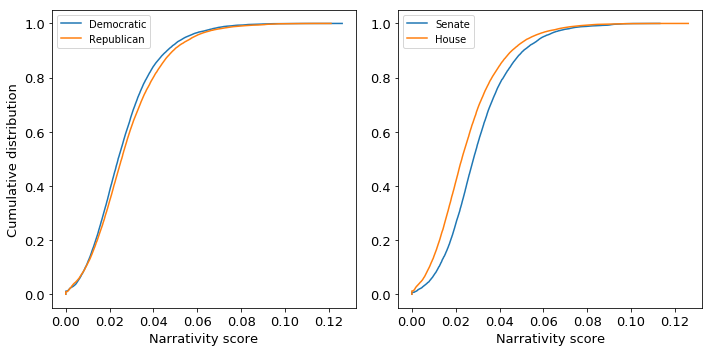

In [42]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
X = df_d['narr_score'].sort_values()
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Democratic')
X = df_r['narr_score'].sort_values()
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Republican')
plt.legend()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Cumulative distribution',fontsize=13)
plt.xlabel('Narrativity score',fontsize=13)

plt.subplot(1,2,2)
X = df_S['narr_score'].sort_values()
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Senate')
X = df_H['narr_score'].sort_values()
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.plot(X,Y, label='House')
plt.legend()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Narrativity score',fontsize=13)
plt.tight_layout()
# plt.savefig('narr_score_partisan_chamber_cdf.pdf', format='pdf')

In [43]:
import seaborn as sns

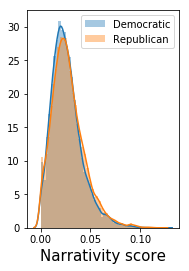

In [51]:
plt.subplot(1,2,1)
sns.distplot(df_d['narr_score'], label='Democratic')
sns.distplot(df_r['narr_score'], label='Republican')
plt.xlabel('Narrativity score', fontsize=15)
plt.legend()

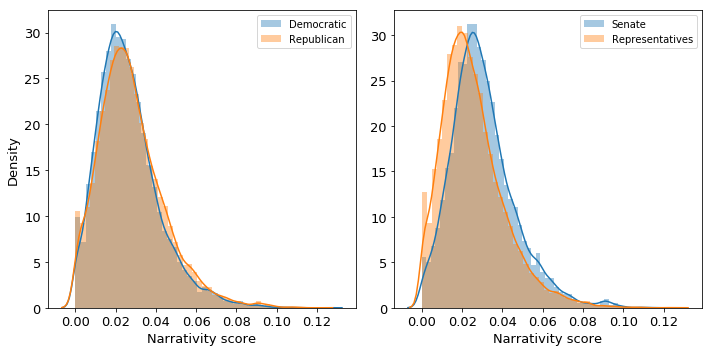

In [57]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
binBoundaries = np.linspace(0,0.12,10)
sns.distplot(df_d['narr_score'], label='Democratic')
sns.distplot(df_r['narr_score'], label='Republican')
plt.legend()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Density',fontsize=13)
plt.xlabel('Narrativity score',fontsize=13)

plt.subplot(1,2,2)
binBoundaries = np.linspace(0,0.12,10)
sns.distplot(df_S['narr_score'],label='Senate')
sns.distplot(df_H['narr_score'], label='Representatives')
plt.legend()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Narrativity score',fontsize=13)
plt.tight_layout()
plt.savefig('narr_score_partisan_chamber.pdf', format='pdf')

### Morality

In [28]:
df['moral_score'] = df.apply(lambda row: compute_morality(row['speech']), axis=1)

In [29]:
df_d = df[df.party == 'D']
df_r = df[df.party == 'R']

In [30]:
df_S = df[df.chamber == 'S']
df_H = df[df.chamber == 'H']

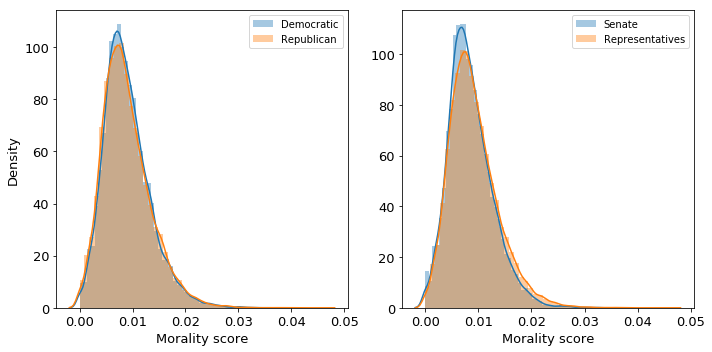

In [56]:

# plt.xticks(fontsize=13)
# plt.yticks(fontsize=13)
# plt.ylabel('Density',fontsize=13)
# plt.xlabel('Narrativity score',fontsize=13)
# plt.tight_layout()
# plt.savefig('narr_score_partisan.pdf', format='pdf')


plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
binBoundaries = np.linspace(0,0.04,10)
sns.distplot(df_d['moral_score'], label='Democratic')
sns.distplot(df_r['moral_score'], label='Republican')
plt.legend()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Density',fontsize=13)
plt.xlabel('Morality score',fontsize=13)



plt.subplot(1,2,2)
binBoundaries = np.linspace(0,0.03,10)
sns.distplot(df_S['moral_score'],label='Senate')
sns.distplot(df_H['moral_score'],  label='Representatives')
plt.legend()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Morality score',fontsize=13)
plt.tight_layout()
plt.savefig('moral_score_partisan_chamber.pdf', format='pdf')

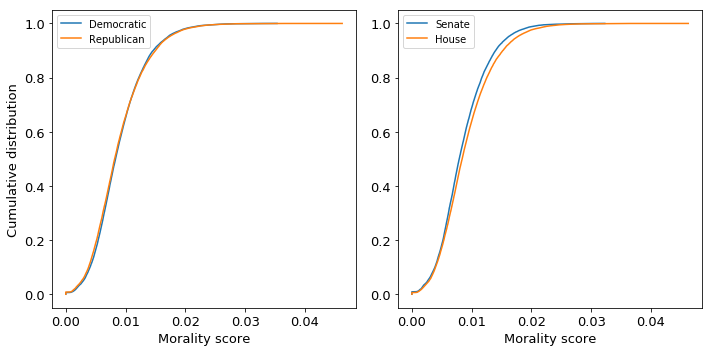

In [59]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
X = df_d['moral_score'].sort_values()
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Democratic')
X = df_r['moral_score'].sort_values()
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Republican')
plt.legend()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Cumulative distribution',fontsize=13)
plt.xlabel('Morality score',fontsize=13)

plt.subplot(1,2,2)
X = df_S['moral_score'].sort_values()
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Senate')
X = df_H['moral_score'].sort_values()
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.plot(X,Y, label='House')
plt.legend()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Morality score',fontsize=13)
plt.tight_layout()
plt.savefig('moral_score_partisan_chamber_cdf.pdf', format='pdf')

In [254]:
df_d.head(2)

,speech_id,speech,party,narr_score,moral_score
1,1140000009,Madam Clerk. first I would like to recognize e...,D,0.018833,0.007364
5,1140000017,My colleagues of the United States House of Re...,D,0.012472,0.009862


In [223]:
stats.pearsonr(df['narr_score'],df['moral_score'])

(-0.05084887228887904, 3.2711755316634384e-20)

In [259]:
stats.pearsonr(df_d['narr_score'],df_d['moral_score'])

(-0.07647529387390206, 7.128937152698602e-22)

In [260]:
stats.pearsonr(df_r['narr_score'],df_r['moral_score'])

(-0.04846773817492971, 3.30652674382351e-10)

In [231]:
stats.pearsonr(df_H['narr_score'],df_H['moral_score'])

(-0.03735118320364551, 3.9690653651377084e-08)

In [274]:
np.percentile(df.narr_score.tolist(), [0,25,50,75,100])

array([0.        , 0.00959314, 0.01631329, 0.02539194, 0.12204187])

In [279]:
np.percentile(df_d.narr_score.tolist(), [0,25,50,75,100])

array([0.        , 0.00938279, 0.01570754, 0.02401302, 0.12204187])

In [280]:
np.percentile(df_r.narr_score.tolist(), [0,25,50,75,100])

array([0.        , 0.0098597 , 0.01698522, 0.02665312, 0.11517642])

In [275]:
sorted(df.narr_score.tolist())[-1]

0.12204187475989244

In [283]:
df_highnarr = df[df['narr_score'] > 0.02539194]
df_d_highnarr = df_d[df_d['narr_score'] > 0.02401302]
df_r_highnarr = df_r[df_r['narr_score'] > 0.02665312]

In [232]:
np.percentile(df.moral_score.tolist(), [0,25,50,75,100])

array([0.        , 0.00581395, 0.00824402, 0.01136966, 0.04624277])

In [233]:
df_highmoral = df[df['moral_score'] > 0.02539194]

In [234]:
stats.pearsonr(df_highmoral['narr_score'],df_highmoral['moral_score'])

(-0.02042755578145041, 0.8299576330275829)

In [278]:
stats.pearsonr(df_highnarr['narr_score'],df_highnarr['moral_score'])

(0.02868685497551737, 0.00942015772416723)

In [284]:
stats.pearsonr(df_d_highnarr['narr_score'],df_d_highnarr['moral_score'])

(0.06408444009718597, 5.7001113321471136e-05)

In [285]:
stats.pearsonr(df_r_highnarr['narr_score'],df_r_highnarr['moral_score'])

(-0.0018496478148072731, 0.9046362364312132)

In [287]:
len(df)

32764

In [310]:
df_topnarr = df.sort_values(by = 'narr_score',ascending=False).head(200)

In [316]:
df_topmoral = df.sort_values(by = 'moral_score',ascending=False).head(200)

In [314]:
df_topnarr.head(1).speech.tolist()

['Mr. Speaker. Tom Hennessy was a beloved columnist at the Long Beach PressTelegram for nearly 30 years. Tom passed away recently with his Duchess Debbie by his side. For his readers. Tom was Mr. Long Beach. He was a humorist. he was an advocate. he was our favorite uncle. and our closest neighbor. He was a friend who lived in the same world. but somehow saw it so much more clearly and never shied away from using his Irish wit to say so. Every morning for three decades Tom was the champion of what was right. good. and decent in Long Beach. I was fortunate to have read him. I was lucky to have known him. and now I will join his readers. his family. and his friends in missing him.']

In [318]:
df_topmoral.head(1).speech.tolist()

['Mr. Speaker. I rise to congratulate Colonel Dave "Cheese" Burgy on his outstanding leadership as commander of the Oklahoma Air National Guards 138th Fighter Wing located at the Tulsa Air National Guard Base. He relinquishes command this Saturday. Colonel Burgy received his Air Force ROTC commission at Arizona State University. He transitioned to the Oklahoma National Guard as a C26 inspector pilot before retraining in the F16. Colonel Burgy has logged over 3.800 military flight hours and deployed five times to fight our Nations wars. As the 138th commander since December 2012. Colonel Burgy led the Air National Guards best fighter wing of over 1.200 airmen. He exemplifies the selfsacrifice and patriotism of the citizen warriors in the National Guard. Colonel Burgy. thank you for your outstanding service to the 138th. the National Guard. and our country.']

In [315]:
df_topnarr.head(1)

,speech_id,speech,party,narr_score,moral_score
52140,1140086345,Mr. Speaker. Tom Hennessy was a beloved column...,D,0.122042,0.005839


In [319]:
df_topmoral.head(1)

,speech_id,speech,party,narr_score,moral_score
32778,1140053611,Mr. Speaker. I rise to congratulate Colonel Da...,R,0.033836,0.046243


In [311]:
len(df_topnarr[df_topnarr.party == 'D'])

73

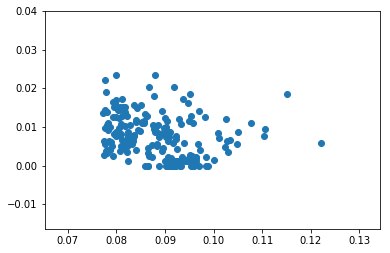

In [312]:
plt.scatter(df_topnarr['narr_score'], df_topnarr['moral_score'])